In [2]:
import importlib
import Parallel_Run_Average_Entropy_Shared_Mem
importlib.reload(Parallel_Run_Average_Entropy_Shared_Mem)
from Parallel_Run_Average_Entropy_Shared_Mem import *

import matplotlib.pyplot as plt
import sys

sys.path.append('/home/hcleroy/PostDoc/a+ging_condensates/Simulation/Gillespie/Analysis/')
sys.path.append('/home/hugo/PostDoc/aging_condensates/Gillespie/Analysis/')
from ToolBox import *
import Phase_Transition as PT
importlib.reload(PT)

sys.path.append('/home//hcleroy/Extra_Module_py')
sys.path.append('/home/hugo/Extra_Module_py')
import formated_matplotlib

Ec = lambda L,N : -3/2*np.log(L/N* np.pi/3)
NRG = lambda eta,Ec : (1+eta)*Ec

In [4]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 1/(V) # for 3D
Nprocess = 50

print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 200000
compute_steps = 30
Energy_range = NRG(np.linspace(0.25,1,5),Ec(ell_tot,Nlinker))

-5.937210903914155


In [5]:
np.linspace(0,2,5)

array([0. , 0.5, 1. , 1.5, 2. ])

In [6]:
for Energy in Energy_range:
    args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
    ST20_big = average_simulations(args,step_tot,compute_steps)
    np.save("Res/Big_Simul/ST20_"+str(truncate(Energy,3))+".npy",ST20_big)

KeyboardInterrupt: 

In [ ]:
ST20_E = []
for E in Energy_range:
    ST20_E.append(np.load("Res/Big_Simul/ST20_"+str(truncate(E,3))+".npy"))

In [ ]:
Gil_param = (ell_tot,kdiff,Nlinker)
Res = PT.Get_E_Nlinker_Transition_curve(Gil_param)

-7.187 is over.
-7.655 is over.
-3.906 is over.
-4.374 is over.
-6.718 is over.
-6.249 is over.
-3.437 is over.
-2.968 is over.
-4.843 is over.
-9.999 is over.
-10.468 is over.
-9.53 is over.
-9.062 is over.
-8.593 is over.
-10.936 is over.
-5.78 is over.
-5.312 is over.
-11.405 is over.
-11.874 is over.
-8.124 is over.


Text(0, 0.5, '% of bound linkers')

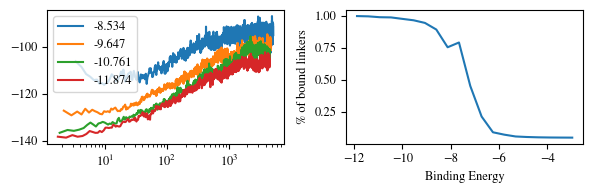

In [ ]:
fig,ax = plt.subplots(ncols=2,figsize=(6,2))
for i,ST20 in enumerate(ST20_E[1:]):
    ax[0].plot(ST20[4:,0],ST20[4:,1],label = str(truncate(Energy_range[i+1],3)))
ax[0].set_xscale('log')
ax[0].legend()

ax[1].plot(np.asarray(Res)[:,0],np.asarray(Res)[:,1]/20)
ax[1].set_xlabel('Binding Energy')
ax[1].set_ylabel('% of bound linkers')